# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
number_mice = len(study_data_complete_df["Mouse ID"].unique())
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
for i,x in enumerate(study_data_complete_df.duplicated(subset=["Mouse ID", "Timepoint"])):
    if x==True:
        print(study_data_complete_df.iloc[i,0:2])

Mouse ID            g989
Drug Regimen    Propriva
Name: 909, dtype: object
Mouse ID            g989
Drug Regimen    Propriva
Name: 911, dtype: object
Mouse ID            g989
Drug Regimen    Propriva
Name: 913, dtype: object
Mouse ID            g989
Drug Regimen    Propriva
Name: 915, dtype: object
Mouse ID            g989
Drug Regimen    Propriva
Name: 917, dtype: object


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_complete_df.loc[study_data_complete_df["Mouse ID"]=="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_complete_df = study_data_complete_df.loc[study_data_complete_df["Mouse ID"] != "g989"]
study_data_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(study_data_complete_df["Mouse ID"].unique())
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary stat table of mean, median, variance, standard deviation, & SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Create the dataframe
stat_data_df = study_data_complete_df.groupby("Drug Regimen")
stat_data_df

# Workout the mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumour_mean = stat_data_df["Tumor Volume (mm3)"].mean()
tumour_median = stat_data_df["Tumor Volume (mm3)"].median()
tumour_variance = stat_data_df["Tumor Volume (mm3)"].var()
tumour_std = stat_data_df["Tumor Volume (mm3)"].std()
tumour_sem = stat_data_df["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.
stat_data_df = pd.DataFrame({"mean tumor volume" : tumour_mean,
                                  "median tumor volume" : tumour_median,
                                  "tumor volume variance" : tumour_variance,
                                  "tumor volume std. dev." : tumour_std,
                                  "tumor volume std. err." : tumour_sem})

# Show results
stat_data_df

,mean tumor volume,median tumor volume,tumor volume variance,tumor volume std. dev.,tumor volume std. err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary stat table of mean, median, variance, standard deviation, & SEM of the tumor volume for each regimen
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
stat_aggregated = study_data_complete_df.groupby(study_data_complete_df["Drug Regimen"])["Tumor Volume (mm3)"].agg\
(["mean", "median", "var", "std", "sem"])

# Show results
stat_aggregated

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

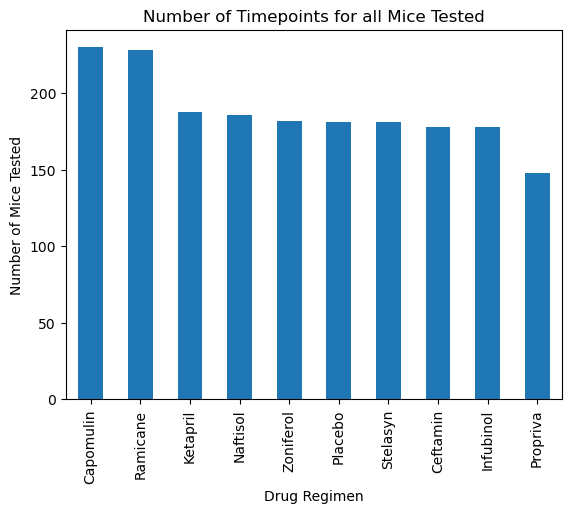

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create the dataframe for the barplot
barplot = study_data_complete_df.groupby(["Drug Regimen"])["Timepoint"].count()
barplot.sort_values(ascending=False).plot.bar()

# Create the graph labels
plt.title("Number of Timepoints for all Mice Tested")
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")

# Display the graph
plt.show()

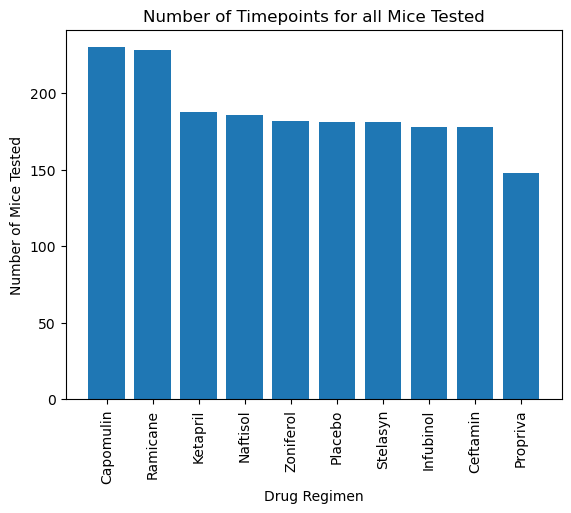

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Create the dataframe for the barplot
yaxis = study_data_complete_df["Drug Regimen"].value_counts()
xaxis = np.arange(len(yaxis))
tick_locations = [value for value in xaxis]
plt.xticks(tick_locations, yaxis.index.values, rotation=90)

# Create the graph labels
plt.title("Number of Timepoints for all Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

# Display the graph
plt.bar(xaxis, yaxis)
plt.show()

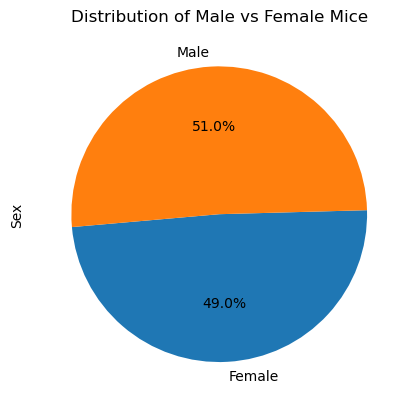

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the mouse by sex
mouse_sex = study_data_complete_df.groupby(["Sex"])["Sex"].count()

# Create the pie chart
labels = ["Female", "Male"]
sizes = [mouse_sex]
mouse_sex.plot.pie(labels = labels, autopct="%1.1f%%", startangle=185)
plt.title("Distribution of Male vs Female Mice")
plt.show()

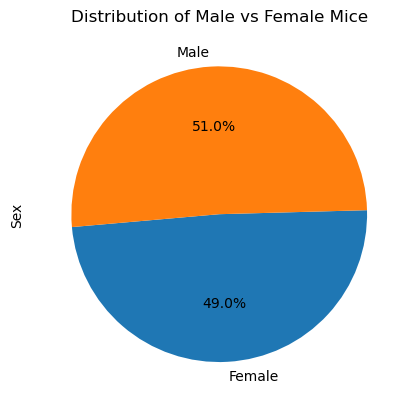

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group the mouse sex
sizes = study_data_complete_df.groupby(["Sex"])["Sex"].count()

# Create the pie chart
labels = ("Female", "Male")
plt.ylabel("Sex")
plt.title("Distribution of Male vs Female Mice")
plt.pie(sizes, labels = labels, startangle = 185, autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor = study_data_complete_df.groupby(["Mouse ID"])["Timepoint"].max()
final_tumor_df = pd.DataFrame(final_tumor)
final_tumor_df = final_tumor_df.rename(columns={"Timepoint": "Max_Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(study_data_complete_df, final_tumor_df, how="left", on=["Mouse ID", "Mouse ID"])
last_timepoint_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] #list of drugs to search for

# Create the empty list to fill with tumor vol data (for plotting)
tumor_volume = [] 

# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:   
    drug_volume = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == drug] #looking for the drugs stated in the list
    
    # Add subset
    final_volume = drug_volume.loc[drug_volume["Timepoint"] == drug_volume["Max_Timepoint"]] #looking in the drug volume list where timepoint & maxtimepoint match
    values = final_volume["Tumor Volume (mm3)"] #bring back the value in the tumor volumn column based on above condition
    tumor_volume.append(values)    #add to the list created  
    
    # Determine outliers using upper and lower bounds
    # Calculate and print the interquartile range (IQR) for each regimen
    # setting the quartile range
    quartiles = values.quantile([.25,.5,.75]) 
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    # finding the IQR
    iqr = upperq-lowerq #where 50 percent of values sit
    print(f'IQR for {drug}: {iqr}')
    
    
    # Find upper and lower bounds to identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Checking for outliers by looking for tumor values above the upper bound and below the lower bound
    outlier = (values.loc[(final_volume["Tumor Volume (mm3)"] > upper_bound) |
                                        (final_volume["Tumor Volume (mm3)"] < lower_bound)]).count()  
    print(f'Number of {drug} outliers: {outlier}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


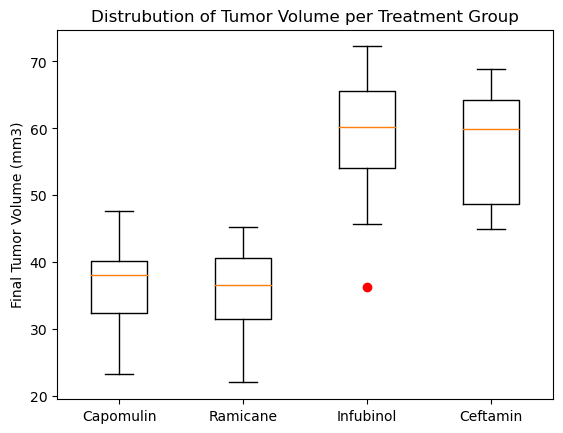

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create the boxplot
plt.boxplot(tumor_volume, sym="ro")

# Label the boxplot
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distrubution of Tumor Volume per Treatment Group")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

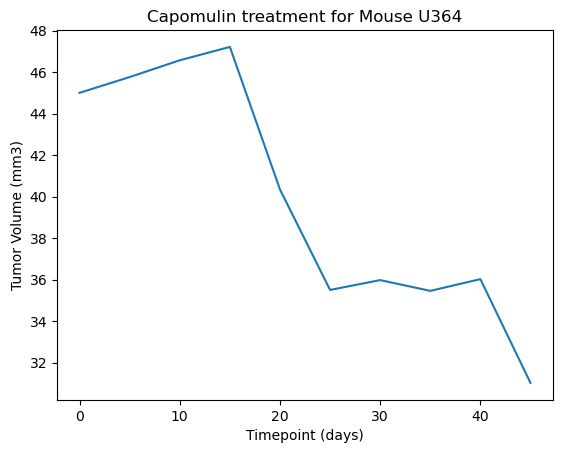

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Extract the data for capomulin
capomulin_results = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == "Capomulin"]

# Extract the data for Mouse u364
mouse_results = capomulin_results.loc[capomulin_results["Mouse ID"]=="u364",:] 

# Plot the results in a line graph
plt.plot(mouse_results["Timepoint"], mouse_results["Tumor Volume (mm3)"])

# Label the graph
plt.title("Capomulin treatment for Mouse U364")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

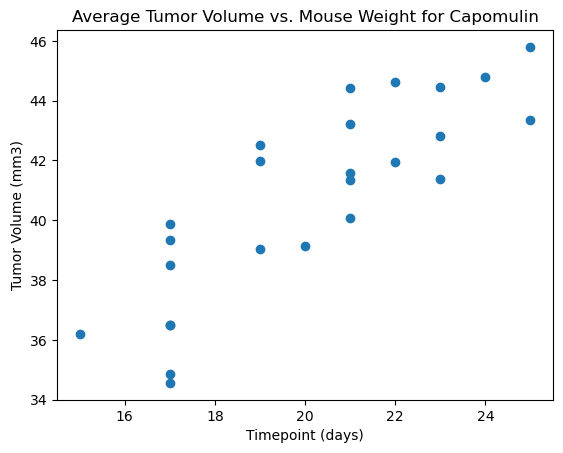

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Group the data by mouse
scatter_plot = capomulin_results.groupby(["Mouse ID"]).mean()

# Create the scatterplot
plt.scatter(scatter_plot["Weight (g)"], scatter_plot["Tumor Volume (mm3)"])

# Label the graph
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


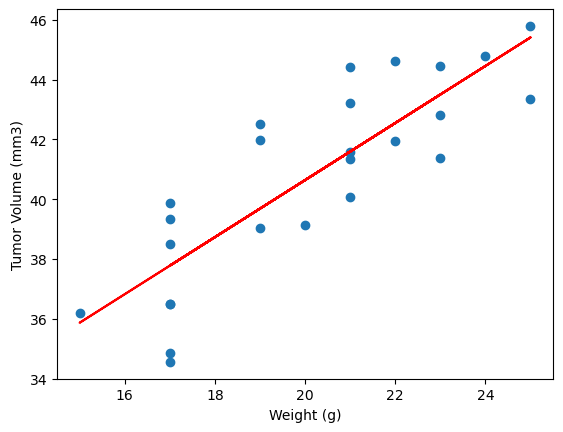

In [21]:
# Calculate the correlation coefficient and linear regression model 

# Set the values
x_values = scatter_plot["Weight (g)"]
y_values = scatter_plot["Tumor Volume (mm3)"]

# Check the correlation coefficient
correlation = st.pearsonr(x_values,y_values)

# Print the outcome
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create the graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label the graph
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()